In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [46]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(9,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [47]:
path = r'D:\internship\codealpha\Unemployment in India.csv'
data = pd.read_csv(path)

In [48]:
data.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
163,Kerala,31-07-2019,Monthly,4.95,4855393.0,34.96,Rural
160,Karnataka,30-06-2020,Monthly,10.92,15396213.0,53.37,Rural
270,Rajasthan,30-06-2020,Monthly,13.86,16076978.0,43.98,Rural
173,Kerala,31-05-2020,Monthly,23.38,3799919.0,33.62,Rural
120,Himachal Pradesh,31-05-2020,Monthly,25.64,1732050.0,42.62,Rural
124,Jammu & Kashmir,31-07-2019,Monthly,13.67,2549316.0,41.71,Rural
383,Andhra Pradesh,31-03-2020,Monthly,9.88,4521537.0,36.08,Urban
145,Jharkhand,31-05-2020,Monthly,55.10,3315038.0,37.03,Rural
695,Telangana,30-04-2020,Monthly,10.50,3378431.0,29.05,Urban
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural


In [49]:
data.shape

(768, 7)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [51]:
data['Date'] = pd.to_datetime(data[' Date'])
data.drop(' Date',axis = 1,inplace = True)
data['Date'].head()

0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]

In [52]:
data.isnull().sum()

Region                                      28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
Date                                        28
dtype: int64

In [53]:
data.duplicated().sum()

27

In [54]:
data[['Region']]

,Region
0,Andhra Pradesh
1,Andhra Pradesh
2,Andhra Pradesh
3,Andhra Pradesh
4,Andhra Pradesh
...,...
763,NaN
764,NaN
765,NaN
766,NaN


In [55]:
data.nunique()

Region                                       28
 Frequency                                    2
 Estimated Unemployment Rate (%)            624
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    626
Area                                          2
Date                                         14
dtype: int64

In [56]:
object_data =data.select_dtypes(include = 'object')
object_data

,Region,Frequency,Area
0,Andhra Pradesh,Monthly,Rural
1,Andhra Pradesh,Monthly,Rural
2,Andhra Pradesh,Monthly,Rural
3,Andhra Pradesh,Monthly,Rural
4,Andhra Pradesh,Monthly,Rural
...,...,...,...
763,NaN,NaN,NaN
764,NaN,NaN,NaN
765,NaN,NaN,NaN
766,NaN,NaN,NaN


,Region,count
0,Andhra Pradesh,28
1,Kerala,28
2,West Bengal,28
3,Uttar Pradesh,28
4,Tripura,28
5,Telangana,28
6,Tamil Nadu,28
7,Rajasthan,28
8,Punjab,28
9,Odisha,28


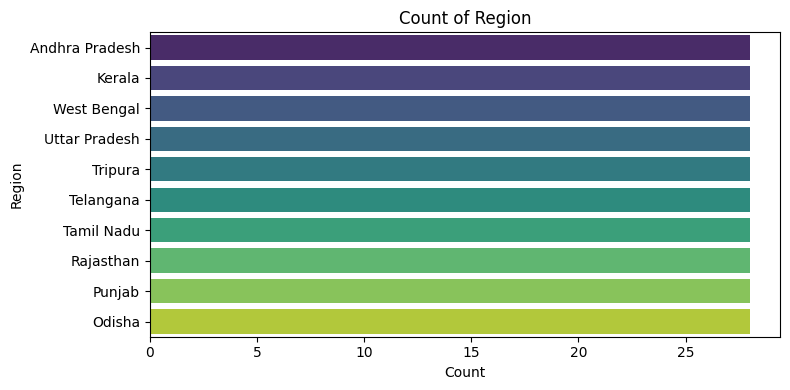

,Frequency,count
0,Monthly,381
1,Monthly,359


<Figure size 640x480 with 0 Axes>

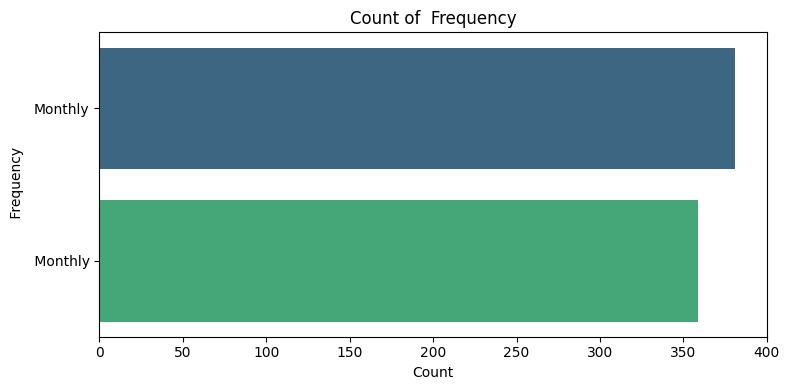

,Area,count
0,Urban,381
1,Rural,359


<Figure size 640x480 with 0 Axes>

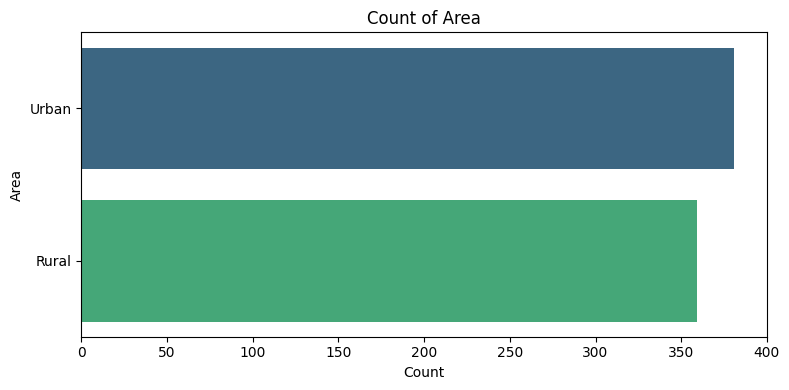

<Figure size 640x480 with 0 Axes>

In [57]:
object_data = data.select_dtypes(include='object')

def Visualize(col, df):
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10], palette='viridis')
    plt.title(f"Count of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.clf()

for i, column in enumerate(object_data.columns):
    if i > 4:  # avoid overloading Jupyter
        break
    display(data[column].value_counts().reset_index())
    Visualize(column, data)


In [58]:
numeric_data =data.select_dtypes(exclude = 'object')
numeric_data

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
0,3.65,11999139.0,43.24,2019-05-31
1,3.05,11755881.0,42.05,2019-06-30
2,3.75,12086707.0,43.50,2019-07-31
3,3.32,12285693.0,43.97,2019-08-31
4,5.17,12256762.0,44.68,2019-09-30
...,...,...,...,...
763,NaN,NaN,NaN,NaT
764,NaN,NaN,NaN,NaT
765,NaN,NaN,NaN,NaT
766,NaN,NaN,NaN,NaT


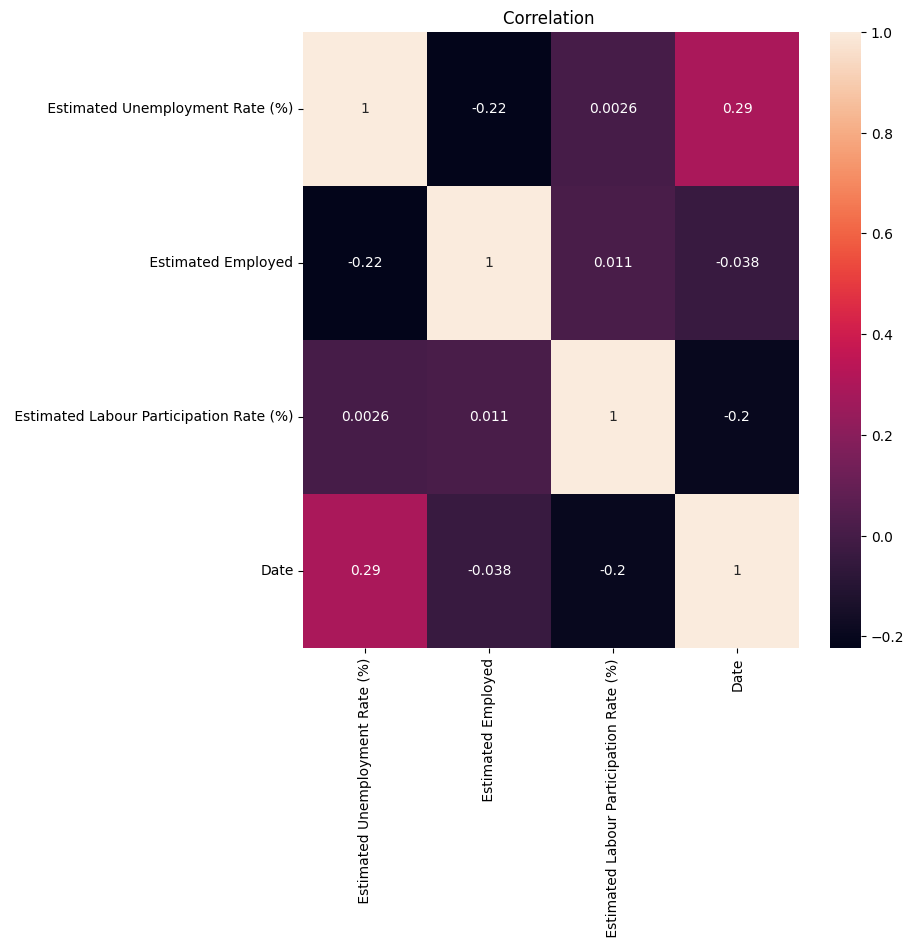

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation ")
plt.show()

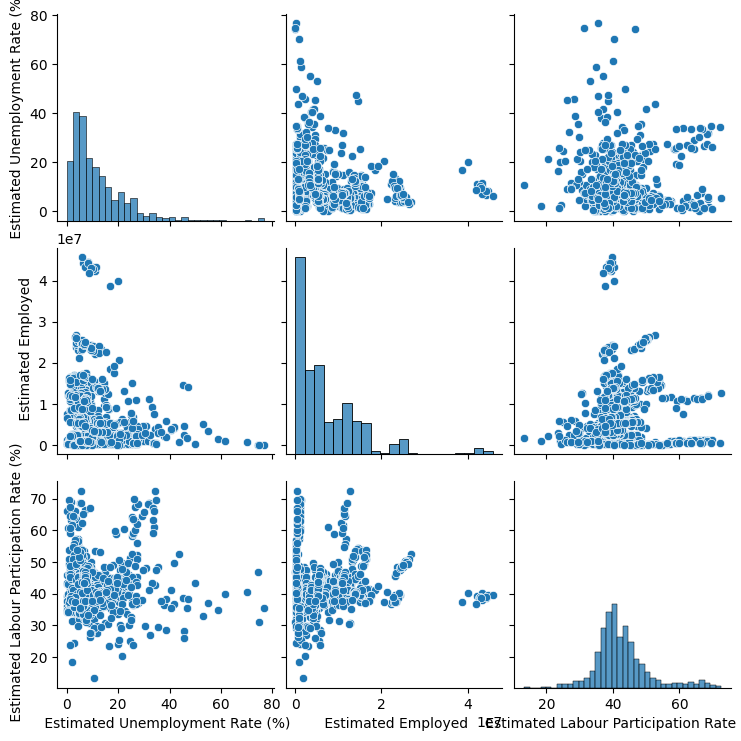

In [60]:
sns.pairplot(data)

In [61]:
data.columns

Index(['Region', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

In [62]:
data.groupby('Region')[[' Frequency', ' Estimated Unemployment Rate (%)','Date']].value_counts().reset_index()

,Region,Frequency,Estimated Unemployment Rate (%),Date,count
0,Andhra Pradesh,Monthly,0.85,2020-06-30,1
1,Andhra Pradesh,Monthly,3.05,2019-06-30,1
2,Andhra Pradesh,Monthly,3.32,2019-08-31,1
3,Andhra Pradesh,Monthly,3.52,2019-10-31,1
4,Andhra Pradesh,Monthly,3.65,2019-05-31,1
...,...,...,...,...,...
735,West Bengal,Monthly,7.83,2019-10-31,1
736,West Bengal,Monthly,7.91,2019-07-31,1
737,West Bengal,Monthly,9.86,2020-06-30,1
738,West Bengal,Monthly,15.22,2020-05-31,1
